In [1]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

# Seaborn

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- https://seaborn.github.io/
- http://seaborn.pydata.org/

In [13]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

plt.style.use('ggplot')

In [3]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터
penguins = sns.load_dataset("penguins") # 펭귄

## Tips Seabonr EX

### Tips 간략 정보 확인하기

In [8]:
tips.shape

(244, 7)

In [9]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [7]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [10]:
tips['sex'].unique(), tips['smoker'].unique(), tips['day'].unique(), tips['time'].unique()

(['Female', 'Male']
 Categories (2, object): ['Male', 'Female'],
 ['No', 'Yes']
 Categories (2, object): ['Yes', 'No'],
 ['Sun', 'Sat', 'Thur', 'Fri']
 Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'],
 ['Dinner', 'Lunch']
 Categories (2, object): ['Lunch', 'Dinner'])

In [11]:
# 결측치 확인 
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### sns.histplot()

- sns.그래프명(x=컬럼명1, y=컬럼명2, data=데이타프레임, 옵션)

예) sns.histplot(x='tip', data=tips)

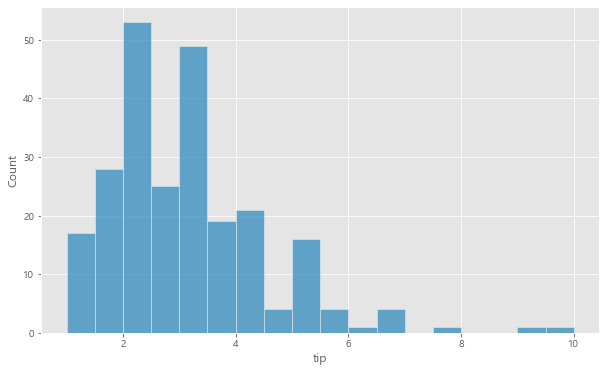

In [15]:
# x축을 tip으로 하는 막대형태 그래프
sns.histplot(x='tip', data=tips);

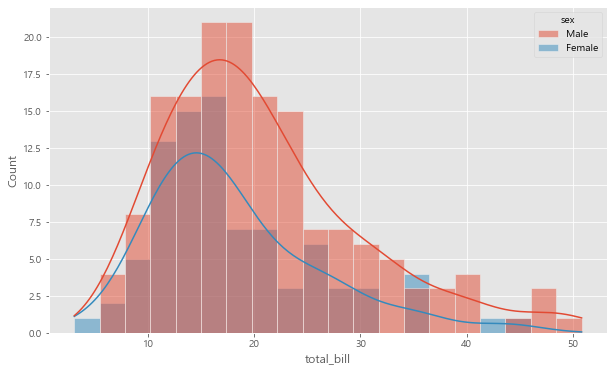

In [17]:
# hue 값은 카테고리형 컬럼명 
# hu를 통해서 성별에 대한 Count확인
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True);

In [18]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

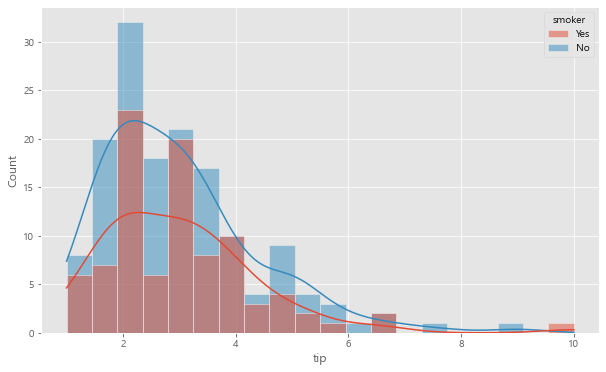

In [20]:
# 흡연 여부에 대한 Tips 확인하기
sns.histplot(x='tip', data=tips, bins=20, hue='smoker', kde=True);

In [21]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

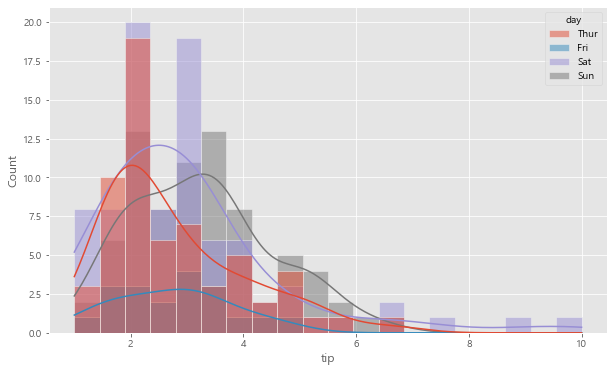

In [23]:
# 요일에 대한 Tips 확인하기
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True);

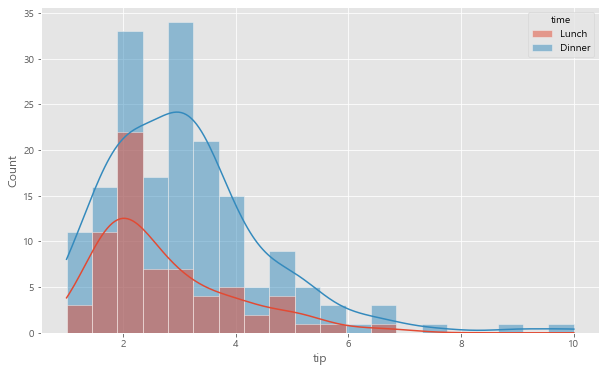

In [25]:
# 시간에 따른 Tips 확인하기
sns.histplot(x='tip', data=tips, bins=20, hue='time', kde=True);

### Subplot

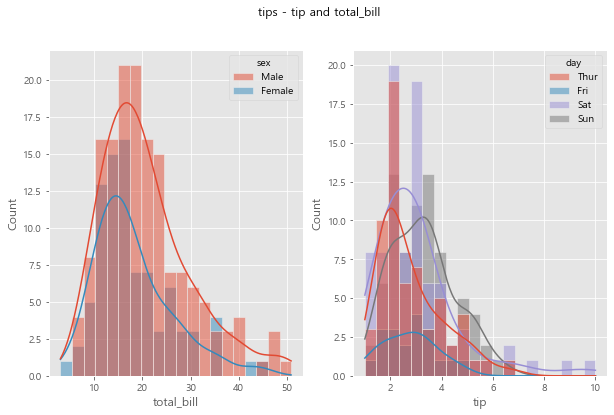

In [27]:
# 성별, 요일별 tips Subplot 확인하기
# 1행 2열로 배치 
# plt.subplot(12순서)

fig1 = plt.figure()

# 1행2열에서 첫번째 그래프 
plt.subplot(121)
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True);

# 1행2열에서 두번째 그래프 
plt.subplot(122)
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True);

plt.suptitle('tips - tip and total_bill')
plt.show()

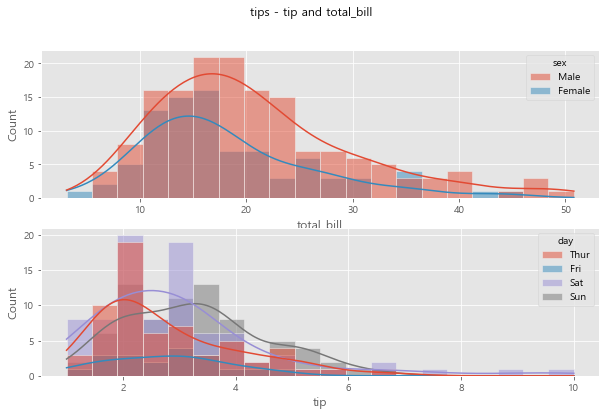

In [29]:
# 2행 1열로 배치 
# plt.subplot(21순서)

fig2 = plt.figure()

# 2행1열에서 첫번째 그래프 
plt.subplot(211)
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True);

# 2행1열에서 두번째 그래프 
plt.subplot(212)
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True);

plt.suptitle('tips - tip and total_bill')

# 그래프 저장 
#plt.savefig('output/tip_and_total_bill.png')

plt.show()

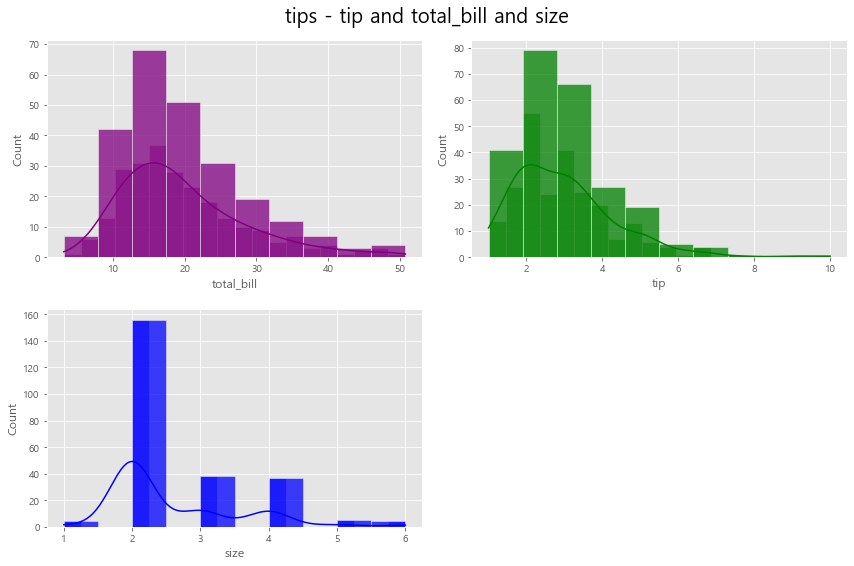

In [34]:
## Tips 데이터프레임에서 'total_bill', 'tip', 'size'  컬럼값을 이용하여 히스토그램을 함께 출력
fig3 = plt.figure(figsize=(12, 8))

columns_list = ['total_bill', 'tip', 'size']
color_list = ['purple', 'green', 'blue']

# for문을 통해서 subplot 작성하기
for i in range(3):
#     print(i)
    plt.subplot(221 + i)
#     sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    sns.histplot(x=columns_list[i], data=tips, bins=20, kde=True, color=color_list[i]);
    sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    
plt.suptitle('tips - tip and total_bill and size', fontsize=20)    
plt.tight_layout(pad=1.2, w_pad=1.5, h_pad=2.0)

# 그래프 저장 
#plt.savefig('output/tip_and_total_bill_and_size.png')

plt.show()
